<a href="https://colab.research.google.com/github/OrestesJoao/Artigo_ComprarOuInvestir/blob/main/AluguelXCompra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alugar ou Comprar um imóvel?**

Vamos analisar as principais vantagens e desvantagens de optar pela compra ou pelo aluguel de imóveis. Para isso, extraímos dados da API do Banco Central, que incluem o preço mediano dos imóveis ao longo dos meses, a variação mensal da taxa Selic e a evolução do Salário Mínimo no Brasil. Usamos uma taxa de 0,75% para calcular o valor do aluguel, representando uma média entre 0,5% e 1%, faixa comum no Brasil.

Período de Análise: Janeiro de 2004 a Janeiro de 2024

**Serão consideradas três hipóteses para entender qual opção pode se mostrar mais vantajosa:**

1. **Hipótese:** Uma pessoa compra um imóvel por R$ 45.000,00 em 2004 e o vende em 2024.

2. **Hipótese:** Uma pessoa investe os R$ 45.000,00 iniciais, obtendo uma rentabilidade de 100% da taxa Selic. Ela utiliza o rendimento desse montante para pagar o aluguel, sem realizar novos aportes.

3. **Hipótese:** A pessoa investe os R$ 45.000,00 iniciais, também com uma rentabilidade de 100% da Selic. Além disso, faz aportes mensais de 20% de dois salários mínimos, com o valor do aluguel sendo descontado dos rendimentos e dos aportes.

Essas hipóteses oferecem um panorama de como o comportamento dos investimentos e o aluguel impactam o valor final e a viabilidade de cada alternativa.



# Sumário

* Limpeza dos Dados
* Estatísticas e Gráficos
* Insights e Conclusão

# Limpeza dos Dados

In [38]:
#Importanto os pacotes utilizados para o estudo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
#Importanto os dados da MVG-R direto da API do BCB
df_imovel = pd.read_csv("https://api.bcb.gov.br/dados/serie/bcdata.sgs.25419/dados?formato=csv", delimiter=";", decimal=",")

In [54]:
#Importanto os dados da MVG-R direto da API do BCB
df_selic = pd.read_csv("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv", delimiter=";", decimal=",")

In [55]:
#Importanto os dados dos Salários Mínimos de cada período direto da API do BCB
df_salario = pd.read_csv("https://api.bcb.gov.br/dados/serie/bcdata.sgs.1619/dados?formato=csv", delimiter=";", decimal=",")

In [56]:
#Corrigindo a coluna data, pois ela veio como tipo objeto e devemos transformala em tipo data
df_imovel['data'] = pd.to_datetime(df_imovel['data'], format = "%d/%m/%Y")
df_selic['data'] = pd.to_datetime(df_selic['data'], format = "%d/%m/%Y")
df_salario['data'] = pd.to_datetime(df_salario['data'], format = "%d/%m/%Y")

In [57]:
#Somando a selic diária para termos a rentabilidade mensal
df_selic['data'] = df_selic['data'].dt.to_period('M')
df_selic = df_selic.groupby('data').agg({'valor': 'sum'}).reset_index()
df_selic.data = df_selic.data.dt.to_timestamp()

In [58]:
#filtrando o intervalo dos dados para melhor análise
df_imovel = df_imovel[(df_imovel['data'] >= "2004-03-01")& (df_imovel['data']<="2024-01-01")]
df_selic = df_selic[(df_selic['data'] >= "2004-03") & (df_selic['data'] <= "2024-01-01")]
df_salario = df_salario[(df_salario['data'] >= "2004-03-01") & (df_salario['data'] <= "2024-01-01")]

**Curiosidade**

A Taxa Selic (Sistema Especial de Liquidação e de Custódia) é a taxa básica de juros da economia brasileira, estabelecida pelo Banco Central do Brasil (BCB).

O Sistema Selic foi criado em 1979 para facilitar a liquidação de operações de títulos públicos, padronizando essas transações e aprimorando a política monetária. A Taxa Selic, estabelecida como a taxa média ponderada de financiamento entre instituições financeiras, passou a ser a taxa básica de juros do Brasil desde 1996, influenciando outras taxas da economia. Ela pode variar diariamente devido à liquidez do sistema financeiro e à oferta e demanda por títulos, refletindo os juros cobrados entre bancos para empréstimos de curto prazo, afetados por fatores como inflação e confiança na economia.


In [45]:
#Configurando a taxa do aluguel para 0,75%
tax_imovel = 0.0075

In [46]:
#Normalização dos DataFrames para comparação do desempenho dos preços dos imóveis VS taxa Selic
df_imovel['valor_norm'] = (df_imovel['valor']/df_imovel['valor'].iloc[0])*100
df_selic['valor_norm'] = (df_selic['valor']/df_selic['valor'].iloc[0])*100

<ipython-input-46-6ecc9b766688>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imovel['valor_norm'] = (df_imovel['valor']/df_imovel['valor'].iloc[0])*100


# Estátisticas e Gráficos

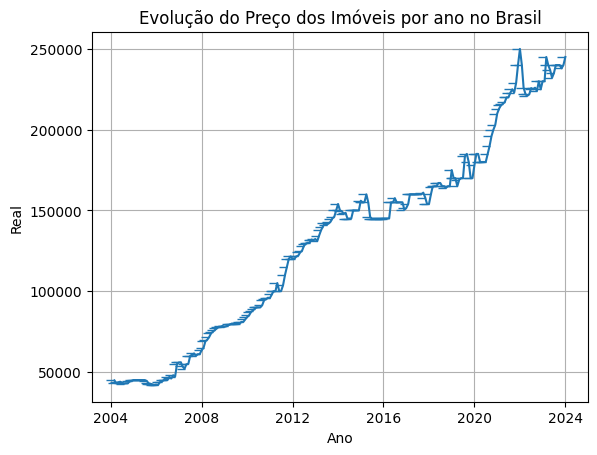

In [10]:
#Gráfico da com a evolução do preço médio dos imóveis no Brasil por ano
plt.plot(df_imovel['data'], df_imovel['valor'], marker=0)
plt.title('Evolução do Preço dos Imóveis por ano no Brasil')
plt.xlabel('Ano')
plt.ylabel('Real')
plt.grid(True)

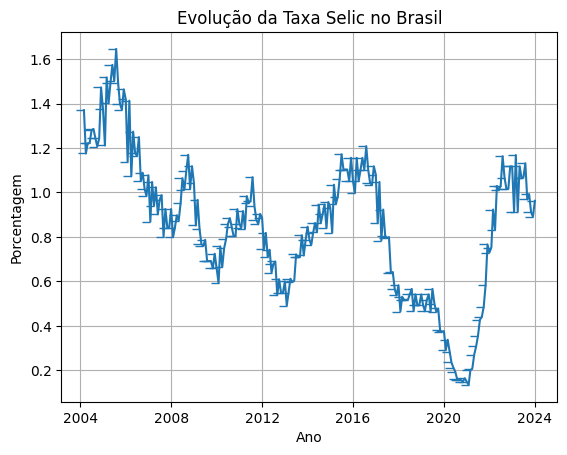

In [11]:
#Gráfico da evolução da taxa selic no Brasil
plt.plot(df_selic['data'], df_selic['valor'], marker=0)
plt.title('Evolução da Taxa Selic no Brasil')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.grid(True)

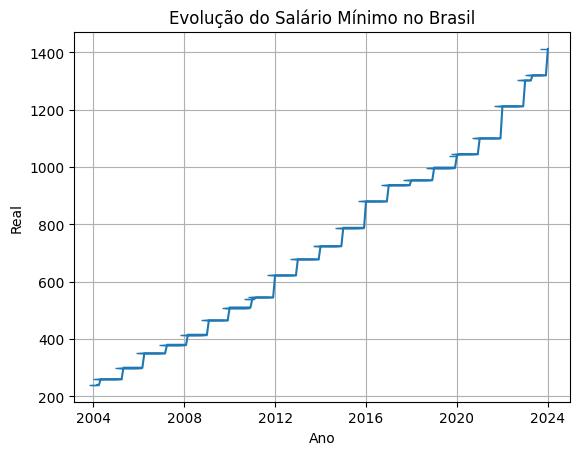

In [12]:
#Gráfico da evolução do Salário Mínimo no Brasil
plt.plot(df_salario['data'], df_salario['valor'], marker=0)
plt.title('Evolução do Salário Mínimo no Brasil')
plt.xlabel('Ano')
plt.ylabel('Real')
plt.grid(True)

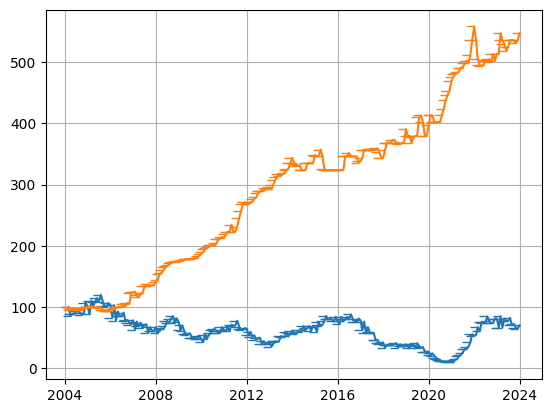

In [13]:
#Comparativo normalizado do crescimento da taxa selic vs o valor dos imóveis
plt.plot(df_selic['data'], df_selic['valor_norm'], marker=0)
plt.plot(df_imovel['data'], df_imovel['valor_norm'], marker=0)
plt.grid(True)

In [14]:
#Simulação da hipótese 2
montante = 45000
rendimento = 0
dados = []
for i, (data, valor_imovel, valor_selic) in enumerate(zip(df_imovel['data'], df_imovel['valor'], df_selic['valor'])):
    aluguel = valor_imovel * tax_imovel
    rendimento = ((valor_selic / 100)) * montante
    montante += rendimento - aluguel

    dados.append({
        'data': data,
        'aluguel': round(aluguel, 2),
        'montante': round(montante, 2)
    })

df_resultado_2 = pd.DataFrame(dados)

print(df_resultado_2)

          data  aluguel   montante
0   2004-03-01   335.98   45280.57
1   2004-04-01   322.50   45490.24
2   2004-05-01   327.28   45718.24
3   2004-06-01   329.81   45947.45
4   2004-07-01   325.99   46209.15
..         ...      ...        ...
234 2023-09-01  1800.00 -160634.56
235 2023-10-01  1800.00 -164029.43
236 2023-11-01  1785.00 -167310.42
237 2023-12-01  1800.00 -170600.73
238 2024-01-01  1837.50 -174079.85

[239 rows x 3 columns]


In [15]:
#Simulação da hipótese 3
montante = 45000
rendimento = 0
dados = []

for i, (data, valor_imovel, valor_selic, valor_salario) in enumerate(zip(df_selic['data'],df_imovel['valor'], df_selic['valor'], df_salario['valor'])):
    aluguel = valor_imovel * tax_imovel
    aportes = 2*valor_salario * 0.2 # Vamos considerar que o individuo receba 2 salários mínimos e aporte 20% deles por mês.
    rendimento = ((valor_selic / 100)) * montante
    montante += aportes + rendimento - aluguel

    dados.append({
        'data': data,
        'aluguel': round(aluguel,2),
        'aportes': round(aportes, 2),
        'montante': round(montante,2)
    })

df_resultado_3 = pd.DataFrame(dados)

print(df_resultado_3)

          data  aluguel  aportes  montante
0   2004-03-01   335.98     96.0  45376.57
1   2004-04-01   322.50     96.0  45683.37
2   2004-05-01   327.28    104.0  46017.73
3   2004-06-01   329.81    104.0  46354.60
4   2004-07-01   325.99    104.0  46725.51
..         ...      ...      ...       ...
234 2023-09-01  1800.00    528.0 -15662.36
235 2023-10-01  1800.00    528.0 -17089.87
236 2023-11-01  1785.00    528.0 -18502.73
237 2023-12-01  1800.00    528.0 -19939.55
238 2024-01-01  1837.50    564.8 -21404.12

[239 rows x 4 columns]


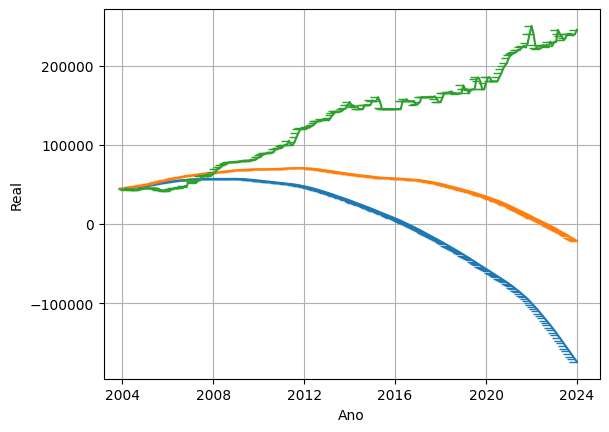

In [81]:
#Gráfico Final com o comparativo das três hipóteses
plt.plot(df_resultado_2['data'],df_resultado_2['montante'],marker=0)
plt.plot(df_resultado_3['data'],df_resultado_3['montante'],marker=0)
plt.plot(df_imovel['data'], df_imovel['valor'], marker=0)
plt.xlabel('Ano')
plt.ylabel('Real')
plt.grid(True)

In [113]:
#Valorização anual do valor dos imóveis
data = pd.date_range(start="2005-01-01", end="2023-12-01", freq='MS')  # Datas do primeiro dia do mês
valores = range(len(data))
df = pd.DataFrame({'data': data, 'valor': valores})

janeiros = df_imovel.loc[(df_imovel['data'].dt.month == 1) & (df_imovel['data'].dt.year >= 2005) & (df_imovel['data'].dt.year <= 2023), 'valor']
dezembros = df_imovel.loc[(df_imovel['data'].dt.month == 12) & (df_imovel['data'].dt.year >= 2005) & (df_imovel['data'].dt.year <= 2023), 'valor']

df_rendimento = pd.DataFrame()

df_rendimento['valorInicial'] = janeiros.values  # Valores de janeiro
df_rendimento['valorFinal'] = dezembros.values    # Valores de dezembro

df_rendimento.index = range(1, len(df_rendimento) + 1)

df_rendimento['valorizacao'] = (df_rendimento['valorFinal']/df_rendimento['valorInicial']) -1

df_rendimento['ano'] = range(2005, 2005 + len(df_rendimento))

df_rendimento['rendimento_acumulado'] = (1 + df_rendimento['valorizacao']).cumprod() - 1

df_rendimento.head(5)

,valorInicial,valorFinal,valorizacao,ano,rendimento_acumulado
1,45000.0,42000.0,-0.066667,2005,-0.066667
2,42194.0,55000.0,0.303503,2006,0.216603
3,55900.0,61036.0,0.091878,2007,0.328382
4,63500.0,78500.0,0.236220,2008,0.642173
5,78000.0,82544.0,0.058256,2009,0.737840


In [96]:
#media da valorização Anual
media_valorizacao = (df_rendimento['valorFinal'].sum() / df_rendimento['valorInicial'].sum()) - 1
print(media_valorizacao)


0.05573535013649922


Text(0.5, 0, 'Ano')

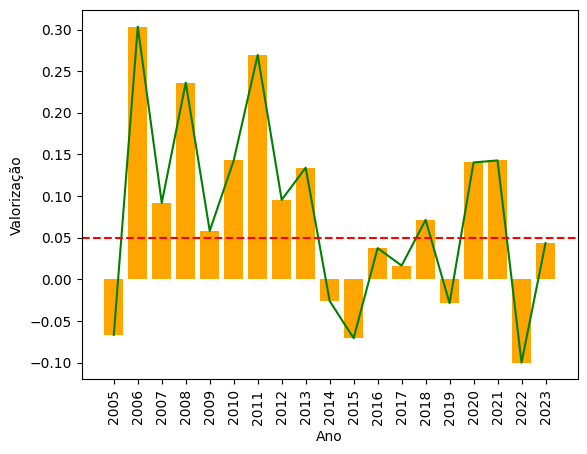

In [105]:
#Gráfico da Valorização dos imóveis por ano
plt.bar(df_rendimento['ano'], df_rendimento['valorizacao'], color='orange')
plt.plot(df_rendimento['ano'], df_rendimento['valorizacao'], color='green')
plt.axhline(y=0.05, color='red', linestyle='--', label='Valorização Média')
plt.xticks(df_rendimento['ano'].astype(int), rotation=90)
plt.ylabel('Valorização')
plt.xlabel('Ano')

Text(0.5, 0, 'Ano')

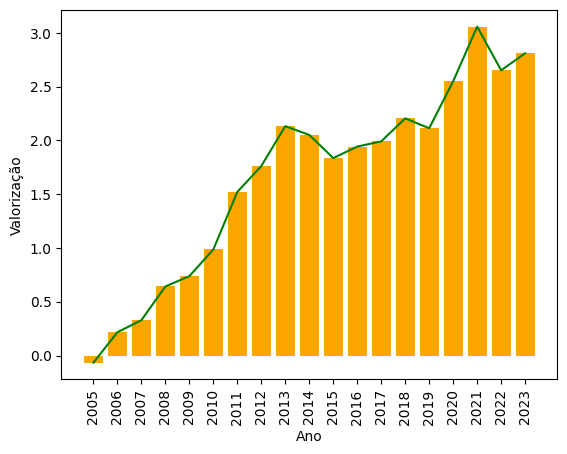

In [109]:
#Gráfico com a valorização acumulada ano por ano
plt.bar(df_rendimento['ano'], df_rendimento['rendimento_acumulado'], color='orange')
plt.plot(df_rendimento['ano'], df_rendimento['rendimento_acumulado'], color='green')
plt.xticks(df_rendimento['ano'].astype(int), rotation=90)
plt.ylabel('Valorização')
plt.xlabel('Ano')

# Conclusão

##Resultado:
* 1 ![Hipótese 1](https://img.shields.io/badge/Hipotese-FF14?style=for-the-badge&logo=&logoColor=white) + R$ 245.000,00 - Lucro <br/>
`Pessoa que realizou a compra do imóvel por R$ 45.000,00 em 2004.`
<br>

* 2 ![Hipótese 2](https://img.shields.io/badge/Hipotese-054F77?style=for-the-badge&logo=&logoColor=white) (-R$ 174.079,85) - Prejuízo<br/>
`Pessoa que realizou o investimento de R$ 45.000,00 em 2004 à 100% da taxa selic sem realizar aportes.`
<br>

* 3 ![Hipótese 3](https://img.shields.io/badge/Hipotese-FF7514?style=for-the-badge&logo=&logoColor=white)  (-R$ 21.404,12) - Prejuízo<br/>
`Pessoa que realizou o investimento de R$ 45.000,00 em 2004 à 100% da taxa selic realizando aporte de 20% de 2 salários mínimos.`
<br>

À primeira vista, pode parecer que a melhor opção seja a compra do imóvel. No entanto, há alguns aspectos importantes a serem considerados.

**Fatores Históricos**

Impactos da Crise de 2008: A crise financeira global de 2008, originada pela bolha imobiliária nos EUA, teve reflexos em várias economias, incluindo o Brasil. Para mitigar seus efeitos no mercado local, o Banco Central iniciou uma série de cortes na taxa Selic a partir de janeiro de 2009, reduzindo-a para 8,75% ao ano no final do mesmo ano – o menor nível até então. Isso tornou o crédito mais acessível, estimulando o financiamento de imóveis e o consumo de bens duráveis.

Programa Minha Casa, Minha Vida (2009): No mesmo período, o governo lançou o programa Minha Casa, Minha Vida, que facilitou o acesso ao crédito para aquisição de imóveis populares. Esse incentivo aqueceu o mercado imobiliário, gerando maior demanda por residências e, consequentemente, uma valorização dos preços dos imóveis nos anos seguintes, especialmente no segmento de imóveis de médio e baixo padrão.

Recessão entre 2014 e 2016: De 2014 a 2016, o Brasil enfrentou uma grave recessão econômica, acompanhada por instabilidade política e altos níveis de desemprego. Esse cenário, combinado com o aumento das taxas de juros, reduziu a demanda por imóveis, levando à estabilização e, em algumas regiões, à queda dos preços. O acesso ao crédito ficou mais restrito, e o mercado imobiliário passou por um período de ajuste.

**Importância de Conhecimento e Organização Financeira**

Na simulação, os investimentos foram tratados de forma simplificada, sem diversificação de carteira ou variação nos aportes, o que deixa o capital altamente exposto às flutuações do mercado e pode resultar em prejuízos em períodos de alta volatilidade econômica. Em uma estratégia de investimentos mais robusta, a diversificação desempenha um papel essencial.

Por exemplo, uma carteira diversificada poderia incluir, além da aplicação em um índice de referência como a Selic, ativos de diferentes classes: títulos de renda fixa de longo prazo, que oferecem mais estabilidade e segurança; fundos multimercado, que combinam ativos de renda fixa e variável, diluindo riscos e proporcionando potencial de retorno superior; e ações de empresas sólidas, que, apesar de serem mais voláteis, podem contribuir com um crescimento maior no longo prazo.

Além disso, é recomendável realizar revisões periódicas desses investimentos, ajustando a carteira conforme as condições econômicas e pessoais mudam. Esse monitoramento permite adequar a exposição ao risco e melhorar os rendimentos, criando uma estratégia mais sólida e preparada para cenários econômicos adversos.

**Conclusão**

Diante de uma simulação básica, focada em investimentos sem diversificação e com aportes fixos, a compra do imóvel tende a ser mais vantajosa do que manter o valor investido para viver de aluguel. No entanto, uma análise mais complexa e personalizada pode levar a conclusões diferentes, dependendo das condições econômicas e da estratégia de investimento adotada.
<br/>
<br/>

Clique aqui para ver meu post no Linkedin com mais informações:
<br/>
<br/>
[![Linkedin](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/joão-pedro-da-silva-orestes-837587234/)